# EEG-Stimuli

## Load Dataset

### View Dataset Attributes

In [1]:
from lib import *
import scipy.io

usable_datasets = get_usable_datasets("./dataset/datasets.mat")

### Load EEG Listening Example

In [13]:
import matplotlib.pyplot as plt
import scipy.io

data = scipy.io.loadmat("./dataset/S13.mat")
data = data["raw"][0][0][3][0][0]

data2 = scipy.io.loadmat("./dataset/S01.mat")
data2 = data2["raw"][0][0][3][0][0]

In [40]:
data.shape[1] / 500

736.55

### Preprocessing Info

In [7]:
proc = scipy.io.loadmat("./dataset/proc/S13.mat")
proc["proc"]

array([[(array(['29'], dtype='<U2'), array([[array(['25'], dtype='<U2'), array(['29'], dtype='<U2')]],
              dtype=object), array(['S13'], dtype='<U3'), array([], dtype='<U1'), array([[ 4.13900000e+03,  4.78900000e+03, -1.50000000e+02,
                 1.00000000e+00,  4.60000000e-02,  1.00000000e+00],
               [ 4.39800000e+03,  5.04800000e+03, -1.50000000e+02,
                 1.00000000e+00,  5.62721000e-01,  2.00000000e+00],
               [ 4.50900000e+03,  5.15900000e+03, -1.50000000e+02,
                 1.00000000e+00,  7.84543000e-01,  3.00000000e+00],
               ...,
               [ 3.65672000e+05,  3.66322000e+05, -1.50000000e+02,
                 1.20000000e+01,  4.58968292e+01,  2.14800000e+03],
               [ 3.65756000e+05,  3.66406000e+05, -1.50000000e+02,
                 1.20000000e+01,  4.60644482e+01,  2.14900000e+03],
               [ 3.65887000e+05,  3.66537000e+05, -1.50000000e+02,
                 1.20000000e+01,  4.63278492e+01,  2.15000000

### Get Total Audio Length

In [4]:
import librosa
import os

sr = 22_050

audio_fis = os.listdir("./dataset/audio")
audio_fis = [os.path.join("./dataset/audio/", fi) for fi in audio_fis]
print(audio_fis)

audio_lens = [librosa.load(fi)[0].shape[0] / sr for fi in audio_fis]
print(audio_lens)

audio_lens

['./dataset/audio/DownTheRabbitHoleFinal_SoundFile1.wav', './dataset/audio/DownTheRabbitHoleFinal_SoundFile10.wav', './dataset/audio/DownTheRabbitHoleFinal_SoundFile11.wav', './dataset/audio/DownTheRabbitHoleFinal_SoundFile12.wav', './dataset/audio/DownTheRabbitHoleFinal_SoundFile2.wav', './dataset/audio/DownTheRabbitHoleFinal_SoundFile3.wav', './dataset/audio/DownTheRabbitHoleFinal_SoundFile4.wav', './dataset/audio/DownTheRabbitHoleFinal_SoundFile5.wav', './dataset/audio/DownTheRabbitHoleFinal_SoundFile6.wav', './dataset/audio/DownTheRabbitHoleFinal_SoundFile7.wav', './dataset/audio/DownTheRabbitHoleFinal_SoundFile8.wav', './dataset/audio/DownTheRabbitHoleFinal_SoundFile9.wav']
[57.54063492063492, 61.26965986394558, 56.170204081632654, 46.98308390022676, 60.84521541950113, 63.259455782312926, 69.98857142857143, 66.27256235827664, 63.77755102040816, 62.89687074829932, 57.31061224489796, 57.22616780045352]


[57.54063492063492,
 61.26965986394558,
 56.170204081632654,
 46.98308390022676,
 60.84521541950113,
 63.259455782312926,
 69.98857142857143,
 66.27256235827664,
 63.77755102040816,
 62.89687074829932,
 57.31061224489796,
 57.22616780045352]

In [5]:
sum(audio_lens)

723.5405895691609

## Visualise Dataset

723.54 seconds of audio \
736.55 seconds of EEG (S13) \
733.05 seconds of EEG (S01) \
734.60 seconds of EEG (S03)

In [9]:
proc = scipy.io.loadmat("./dataset/proc/S13.mat")
proc

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Tue Nov 20 13:10:19 2018',
 '__version__': '1.0',
 '__globals__': [],
 'proc': array([[(array(['29'], dtype='<U2'), array([[array(['25'], dtype='<U2'), array(['29'], dtype='<U2')]],
               dtype=object), array(['S13'], dtype='<U3'), array([], dtype='<U1'), array([[ 4.13900000e+03,  4.78900000e+03, -1.50000000e+02,
                  1.00000000e+00,  4.60000000e-02,  1.00000000e+00],
                [ 4.39800000e+03,  5.04800000e+03, -1.50000000e+02,
                  1.00000000e+00,  5.62721000e-01,  2.00000000e+00],
                [ 4.50900000e+03,  5.15900000e+03, -1.50000000e+02,
                  1.00000000e+00,  7.84543000e-01,  3.00000000e+00],
                ...,
                [ 3.65672000e+05,  3.66322000e+05, -1.50000000e+02,
                  1.20000000e+01,  4.58968292e+01,  2.14800000e+03],
                [ 3.65756000e+05,  3.66406000e+05, -1.50000000e+02,
                  1.20000000e+01,  4.60

In [45]:
# Max Segments := 2150

proc_data = proc["proc"]
proc_data_segs = proc_data[0][0][4]
proc_data_segs[0], proc_data_segs[1], proc_data_segs[2]

(array([ 4.139e+03,  4.789e+03, -1.500e+02,  1.000e+00,  4.600e-02,
         1.000e+00]),
 array([ 4.39800e+03,  5.04800e+03, -1.50000e+02,  1.00000e+00,
         5.62721e-01,  2.00000e+00]),
 array([ 4.50900e+03,  5.15900e+03, -1.50000e+02,  1.00000e+00,
         7.84543e-01,  3.00000e+00]))

In [46]:
proc2 = scipy.io.loadmat("./dataset/proc/S01.mat")
proc2

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Tue Nov 20 13:10:15 2018',
 '__version__': '1.0',
 '__globals__': [],
 'proc': array([[(array(['29'], dtype='<U2'), array([[array(['25'], dtype='<U2'), array(['29'], dtype='<U2')]],
               dtype=object), array(['S01'], dtype='<U3'), array([], dtype='<U1'), array([[ 1.73600000e+03,  2.38600000e+03, -1.50000000e+02,
                  1.00000000e+00,  4.60000000e-02,  1.00000000e+00],
                [ 1.99500000e+03,  2.64500000e+03, -1.50000000e+02,
                  1.00000000e+00,  5.62721000e-01,  2.00000000e+00],
                [ 2.10600000e+03,  2.75600000e+03, -1.50000000e+02,
                  1.00000000e+00,  7.84543000e-01,  3.00000000e+00],
                ...,
                [ 3.63237000e+05,  3.63887000e+05, -1.50000000e+02,
                  1.20000000e+01,  4.58968292e+01,  2.14800000e+03],
                [ 3.63321000e+05,  3.63971000e+05, -1.50000000e+02,
                  1.20000000e+01,  4.60

In [47]:
# Max Segments := 2150

proc_data = proc2["proc"]
proc_data_segs = proc_data[0][0][4]
proc_data_segs[0], proc_data_segs[1], proc_data_segs[2]

(array([ 1.736e+03,  2.386e+03, -1.500e+02,  1.000e+00,  4.600e-02,
         1.000e+00]),
 array([ 1.99500e+03,  2.64500e+03, -1.50000e+02,  1.00000e+00,
         5.62721e-01,  2.00000e+00]),
 array([ 2.10600e+03,  2.75600e+03, -1.50000e+02,  1.00000e+00,
         7.84543e-01,  3.00000e+00]))

In [43]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,3)
print(data.shape[0])

def go(data, s_off, e_off):
    for i in list(range(data.shape[0]))[1:60]:
        # plt.plot(data[i, s_off:data.shape[1]-e_off])
        plt.plot(data[i, s_off:e_off])

62


(736.55, 12.0, 16.549999999999955)

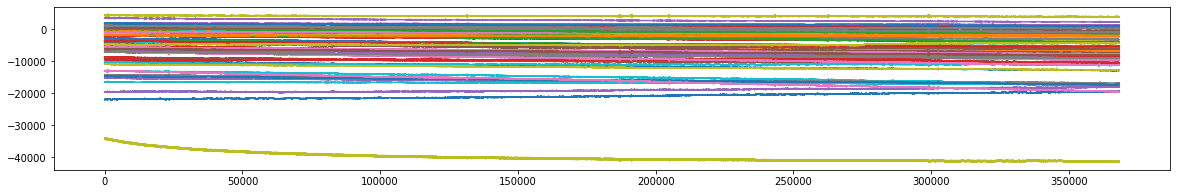

In [27]:
go(data, 0, -1)
data_secs = data.shape[1] / 500
data_secs, data_secs // 60, data_secs % 60

(733.05, 12.0, 13.049999999999955)

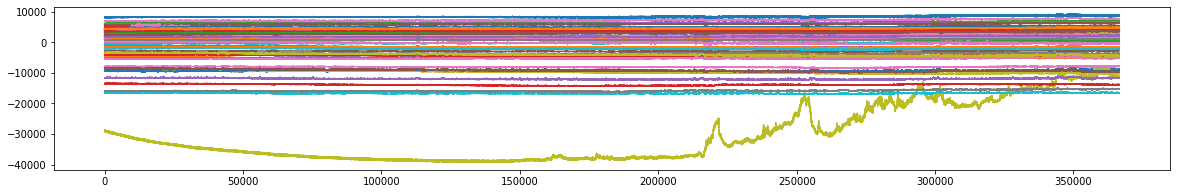

In [28]:
go(data2, 0, -1)
data2_secs = data2.shape[1] / 500
data2_secs, data2_secs // 60, data2_secs % 60